Discover users who are accessing our curriculum pages way beyond the end of their codeup time. What would the dataframe look like? Use time series method for detecting anomalies, like exponential moving average with %b.

Bonus:

Can you label students who are viewing both the web dev and data science curriculum? Can you label students by the program they are in? Can you label users by student vs. staff? What are Zach, Maggie, David, and Ryan's ids?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Acquire

In [2]:
df = pd.read_csv("anonymized-curriculum-access.txt", sep=" ", header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399195 entries, 0 to 399194
Data columns (total 6 columns):
0    399195 non-null object
1    399195 non-null object
2    399195 non-null object
3    399195 non-null int64
4    372441 non-null float64
5    399195 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 18.3+ MB


In [4]:
df.head()

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [5]:
df.describe()

,3,4
count,399195.000000,372441.000000
mean,268.794667,26.912649
std,147.587312,7.846146
min,1.000000,1.000000
25%,157.000000,23.000000
50%,288.000000,27.000000
75%,392.000000,31.000000
max,543.000000,52.000000


## Prep

In [6]:
df = df.rename(columns={0:"date", 1:"time", 2:"page", 3:"num1", 4:"num2", 5:"ip"})
df

,date,time,page,num1,num2,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
399190,2019-11-19,10:06:28,spring/fundamentals/controllers,445,33.0,97.105.19.58
399191,2019-11-19,10:06:50,spring/fundamentals/views,445,33.0,97.105.19.58
399192,2019-11-19,10:07:03,8-clustering/3-wrangle,475,34.0,97.105.19.58
399193,2019-11-19,10:07:07,7-classification/2-acquire,475,34.0,97.105.19.58


> What are those two columns of numbers? 

### Combine the date and time and set as the index

In [7]:
df.date = df.date + " " + df.time
df.drop("time", axis=1, inplace=True)

In [8]:
df.head()

,date,page,num1,num2,ip
0,2018-01-26 09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [9]:
df.date = pd.to_datetime(df.date)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399195 entries, 0 to 399194
Data columns (total 5 columns):
date    399195 non-null datetime64[ns]
page    399195 non-null object
num1    399195 non-null int64
num2    372441 non-null float64
ip      399195 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 15.2+ MB


In [11]:
df = df.set_index("date")

### Scope out at nulls

In [12]:
df.isnull().sum()

page        0
num1        0
num2    26754
ip          0
dtype: int64

> Unsure how to address nulls at the moment, as it is unknown what that column is representing

## Explore

In [13]:
df

,page,num1,num2,ip
date,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...
2019-11-19 10:06:28,spring/fundamentals/controllers,445,33.0,97.105.19.58
2019-11-19 10:06:50,spring/fundamentals/views,445,33.0,97.105.19.58
2019-11-19 10:07:03,8-clustering/3-wrangle,475,34.0,97.105.19.58


### Dive into num1

In [14]:
df.num1.describe()

count    399195.000000
mean        268.794667
std         147.587312
min           1.000000
25%         157.000000
50%         288.000000
75%         392.000000
max         543.000000
Name: num1, dtype: float64

In [15]:
df.num1.value_counts()

53     8236
64     8008
11     8004
344    5279
1      4266
       ... 
66        1
461       1
163       1
165       1
212       1
Name: num1, Length: 543, dtype: int64

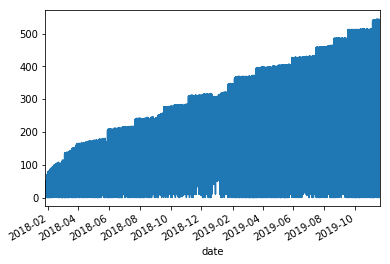

In [16]:
df.num1.plot()
plt.show()

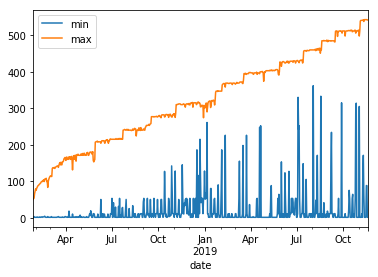

In [17]:
df.num1.resample("D").min().plot(label="min")
df.num1.resample("D").max().plot(label="max")
plt.legend()
plt.show()

> I still don't know what these values are

### Dive into num2

In [18]:
df.num2.describe()

count    372441.000000
mean         26.912649
std           7.846146
min           1.000000
25%          23.000000
50%          27.000000
75%          31.000000
max          52.000000
Name: num2, dtype: float64

In [19]:
df.num2.value_counts()

29.0    35969
24.0    35039
33.0    34433
22.0    28875
23.0    28056
32.0    26801
26.0    26760
25.0    25233
31.0    22665
28.0    20677
27.0    20198
34.0    15519
51.0    10835
14.0     9069
1.0      8877
21.0     7181
17.0     3792
52.0     2896
13.0     2610
8.0      1671
18.0     1603
19.0     1142
16.0      740
15.0      691
7.0       461
12.0      270
11.0      204
2.0        93
6.0        72
9.0         5
4.0         4
Name: num2, dtype: int64

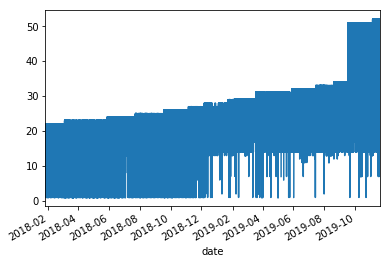

In [20]:
df.num2.plot()
plt.show()

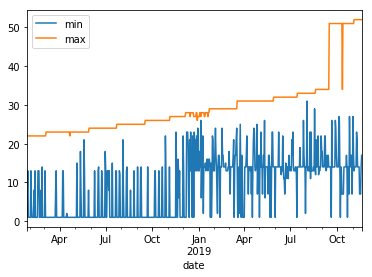

In [21]:
df.num2.resample("D").min().plot(label="min")
df.num2.resample("D").max().plot(label="max")
plt.legend()
plt.show()

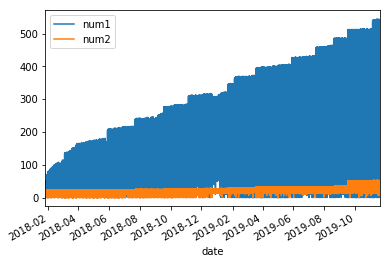

In [22]:
df.plot()
plt.show()

In [31]:
df[["num1","num2"]].groupby("num2").agg(["min","max"])

num1     
      min  max
num2          
1.0    11  402
2.0   144  396
4.0    85   85
6.0   283  405
7.0    77  513
8.0     1  174
9.0   152  152
11.0   88  463
12.0   88  214
13.0   50  318
14.0   53  246
15.0   72  427
16.0   21  322
17.0  102  465
18.0   26  217
19.0   37  486
21.0   10  346
22.0    2  459
23.0   25  319
24.0  182  278
25.0  218  282
26.0  259  315
27.0  287  401
28.0    1  539
29.0  323  347
31.0  373  464
32.0  407  426
33.0  433  543
34.0  358  487
51.0  488  512
52.0  516  542

> what are y'all

In [36]:
df [df.num2.isnull()]

,page,num1,num2,ip
date,,,,
2018-01-26 16:46:16,/,48,NaN,97.105.19.61
2018-01-26 16:46:24,spring/extra-features/form-validation,48,NaN,97.105.19.61
2018-01-26 17:54:24,/,48,NaN,97.105.19.61
2018-01-26 18:32:03,/,48,NaN,97.105.19.61
2018-01-26 18:32:17,mysql/relationships/joins,48,NaN,97.105.19.61
...,...,...,...,...
2019-11-19 08:16:46,6-regression/8.0-Project,349,NaN,156.80.4.22
2019-11-19 08:17:02,7-classification/3-prep,349,NaN,156.80.4.22
2019-11-19 08:17:18,7-classification/4-explore,349,NaN,156.80.4.22


#### Dive into ip

In [15]:
df.page.value_counts()

/                                                20564
javascript-i                                      8140
search/search_index.json                          7005
toc                                               6679
html-css                                          6143
                                                 ...  
collections                                          1
html-css/media-queries                               1
examples/css//logincss                               1
7-clustering/dbscan                                  1
content/appendix/postwork/facebook-clone.html        1
Name: page, Length: 1641, dtype: int64

> Do they need cleanup? 

In [20]:
df [df.page.str.startswith("search")].page.value_counts()

search/search_index.json    7005
search                         2
Name: page, dtype: int64

In [21]:
df [df.page.str.startswith("html-css")].page.value_counts()

html-css                                       6143
html-css/elements                              3644
html-css/css-ii/bootstrap-introduction         3211
html-css/css-ii/bootstrap-grid-system          3203
html-css/forms                                 3112
html-css/css-i/positioning                     2477
html-css/css-i/selectors-and-properties        2461
html-css/css-ii/media-queries                  2406
html-css/css-i/box-model                       2305
html-css/introduction                          2161
html-css/css-i/introduction                    2015
html-css/css-ii/grids                          1386
html-css/css-i                                 1270
html-css/css-ii                                1148
html-css/css-i/flexbox/flexbox-fundamentals    1002
html-css/css-i/grid/css-grid-fundamentals       786
html-css/css-i/flexbox/flexbox-in-practice      722
html-css/css-i/grid/css-grid-in-practice        685
html-css/css-i/grid/css-grid-intro              604
html-css/css

In [22]:
df [df.page.str.startswith("spring")].page.value_counts()

spring                                         5761
spring/fundamentals/views                      2913
spring/fundamentals/repositories               2793
spring/fundamentals/controllers                2582
spring/fundamentals/form-model-binding         2290
spring/setup                                   2252
spring/fundamentals/relationships              2206
spring/fundamentals/services                   1995
spring/fundamentals/security/authentication    1964
spring/fundamentals/security                   1165
spring/extra-features/form-validation           614
spring/extra-features/json-response             609
spring/extra-features/file-upload               561
spring/extra-features/error-pages               434
spring/extra-features                           368
spring/fundamentals/integration-tests            52
spring/form-model-binding                        19
spring/views                                     19
spring/repositories                               5
spring/funde